In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1501,2020-09-02,United Kingdom,337537.0,337168.0,41538.0,41504.0,369.0,34.0
1502,2020-09-02,Germany,244236.0,244855.0,9311.0,9313.0,-619.0,-2.0
1503,2020-09-02,Iran,379538.0,376894.0,21825.0,21672.0,2644.0,153.0
1504,2020-09-02,Turkey,271357.0,271705.0,6404.0,6417.0,-348.0,-13.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  8158.466135458168
RMSE =  31984.322918731938


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  302.3187250996016
RMSE =  745.9116003507712


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  57549.58741258741
RMSE =  100570.54893866878
-- World performances for deaths --
MAE =  1702.6993006993007
RMSE =  2086.1827957642295


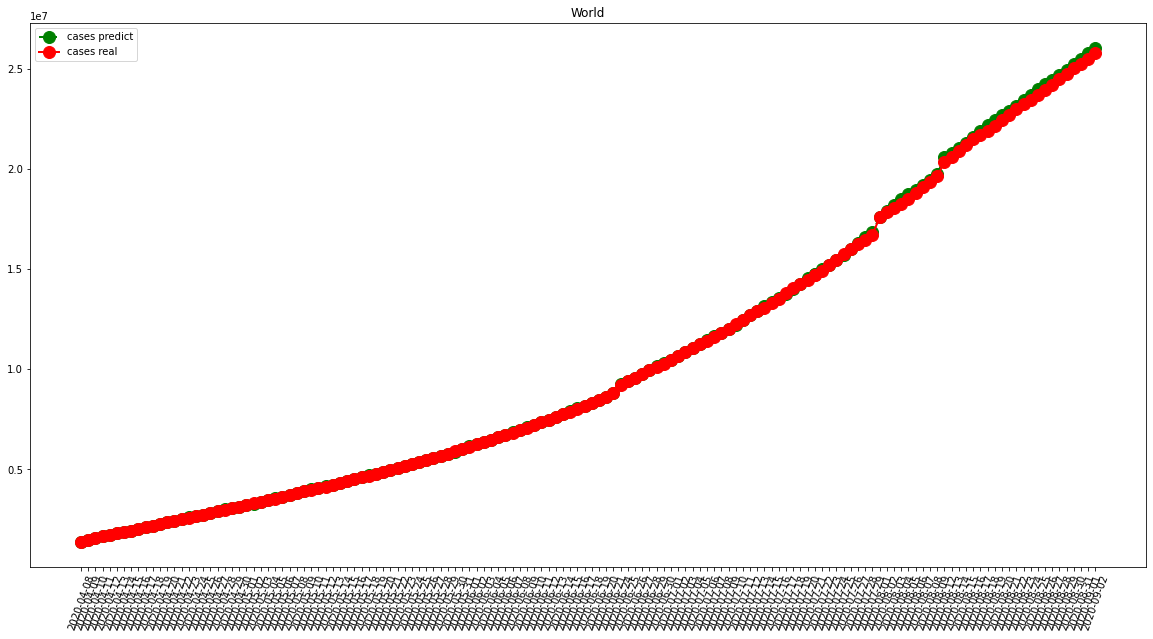

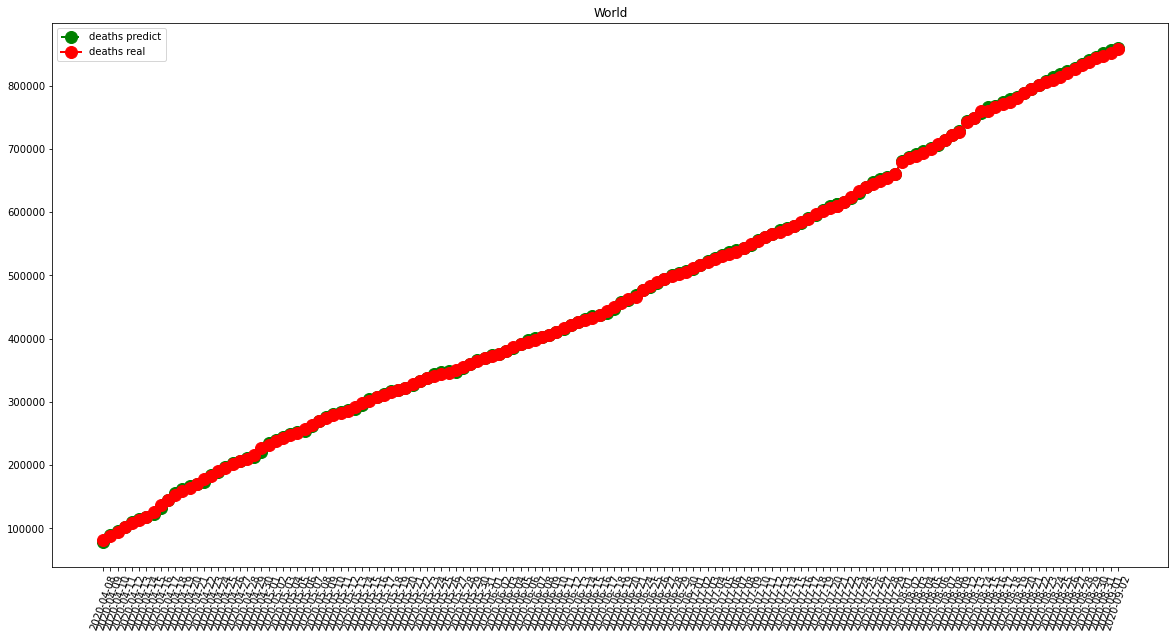

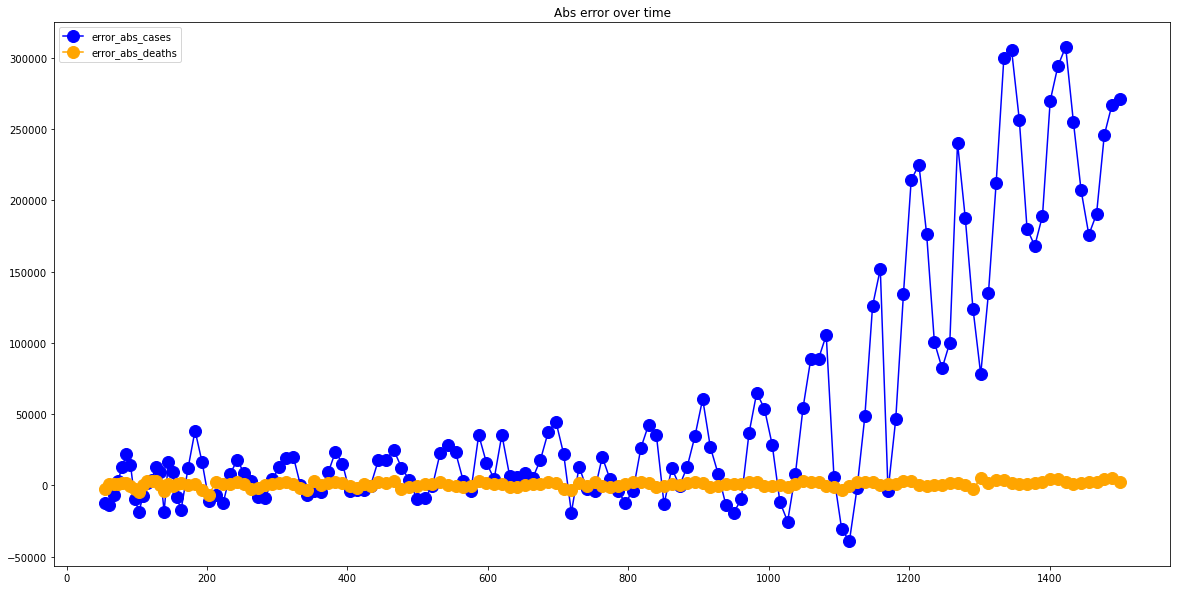

In [7]:
visShow("World")

-- France performances for cases --
MAE =  965.2287581699346
RMSE =  1453.1764081496142
-- France performances for deaths --
MAE =  121.99346405228758
RMSE =  271.1654946526126


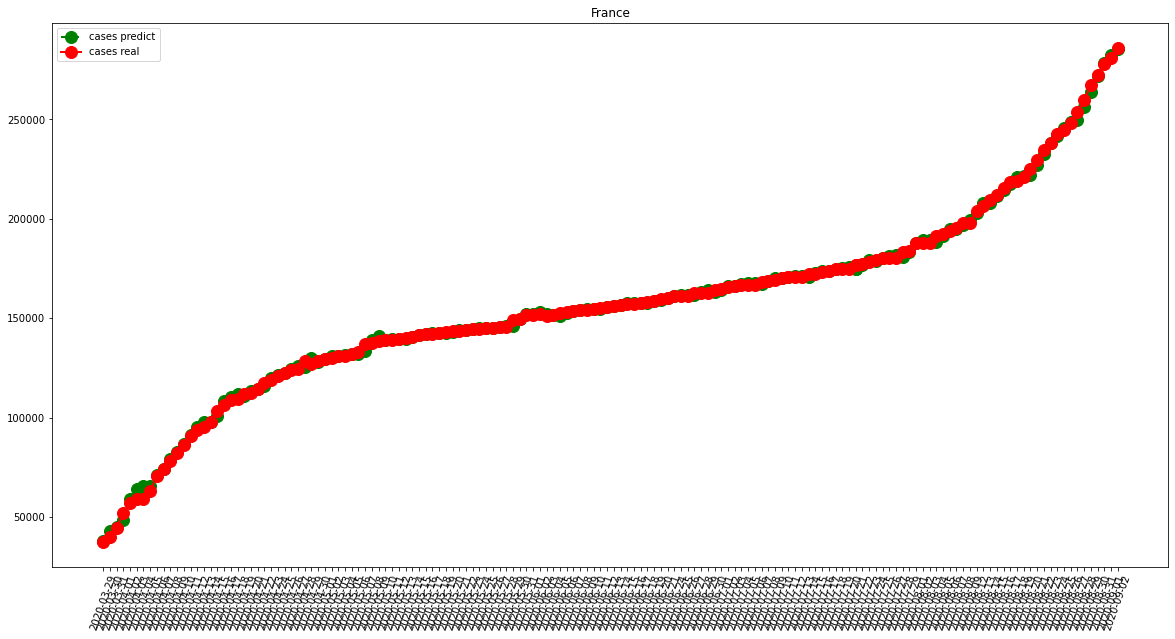

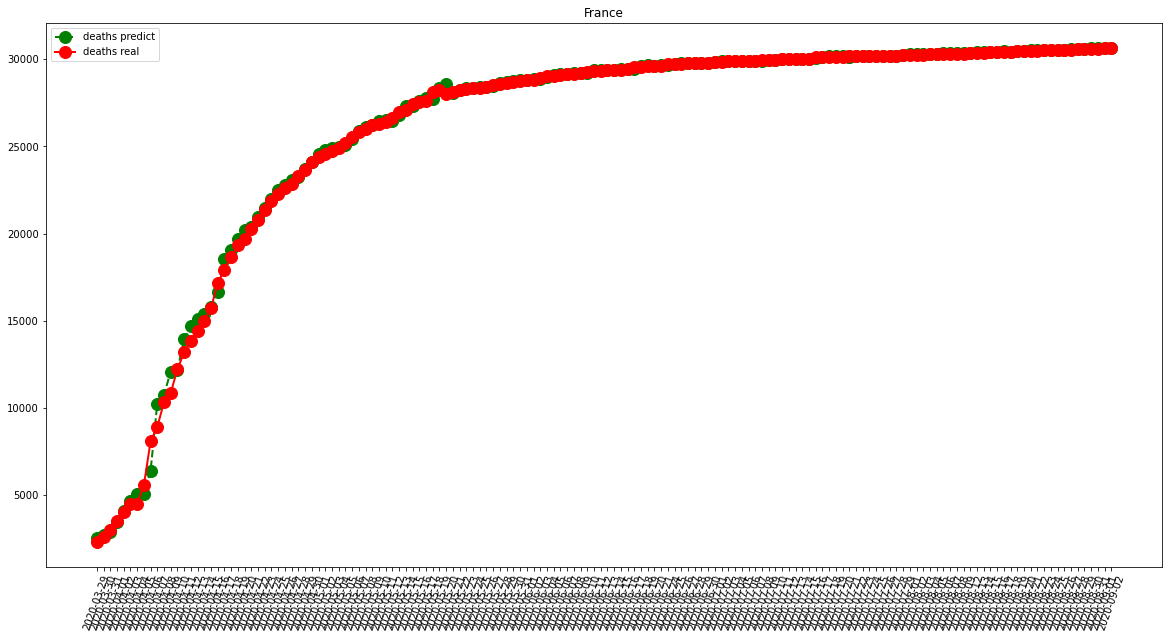

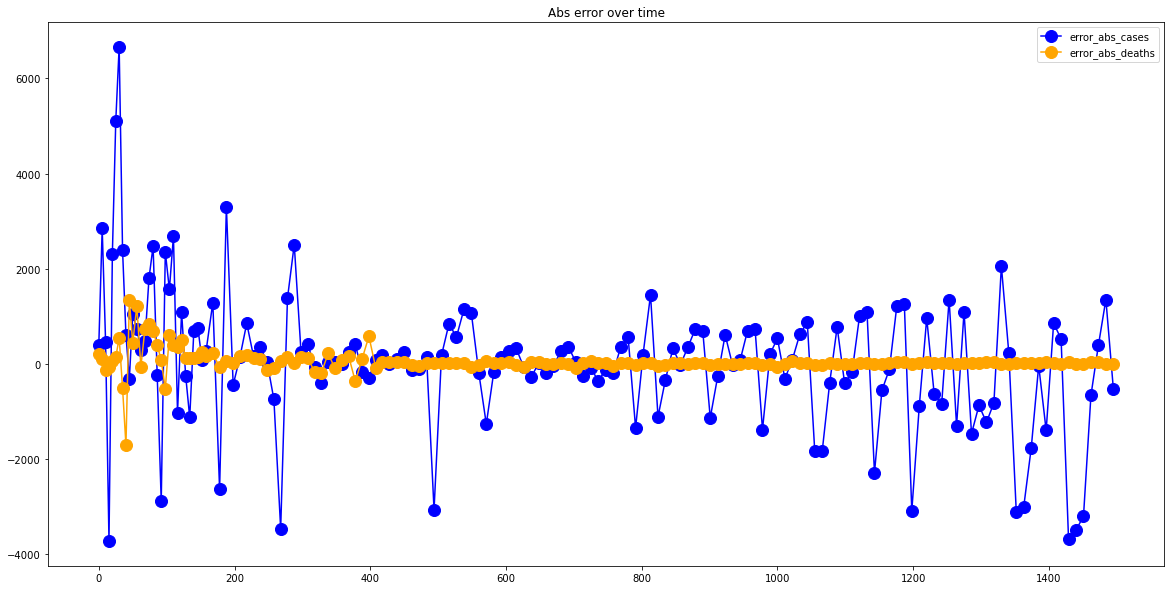

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  301.8562091503268
RMSE =  454.58919183514837
-- Italy performances for deaths --
MAE =  72.88235294117646
RMSE =  239.98988268435332


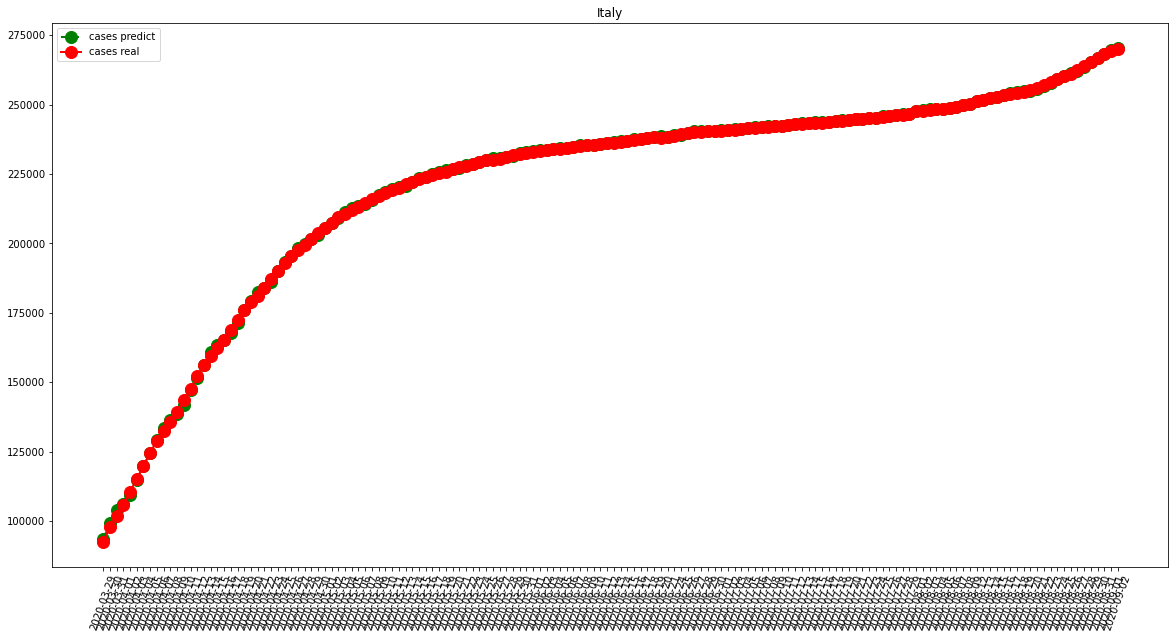

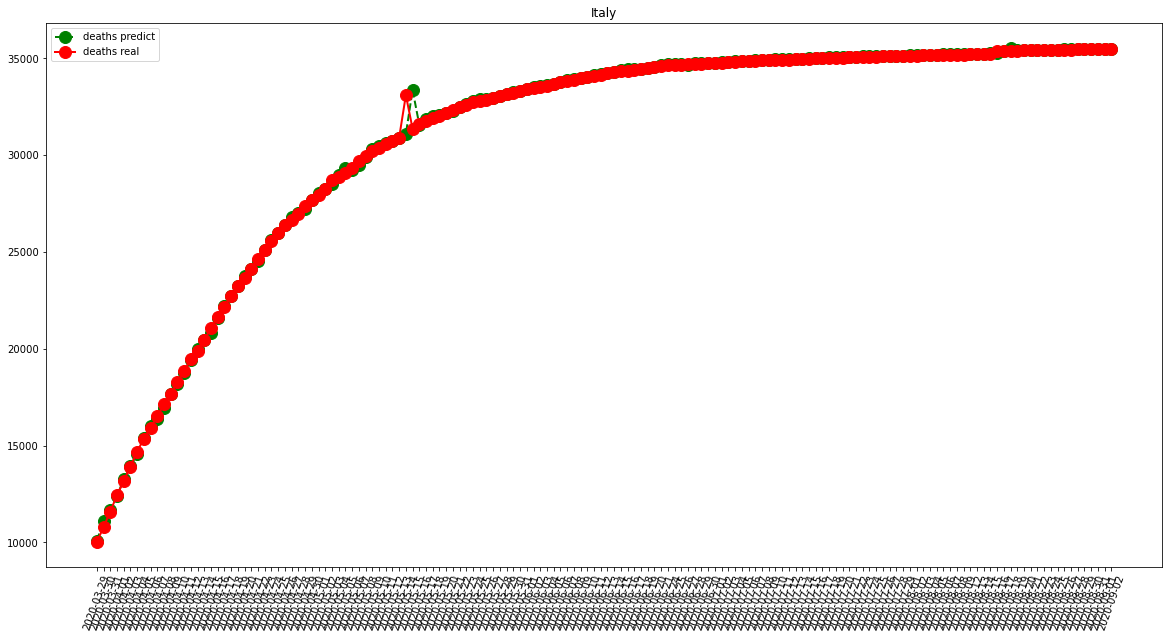

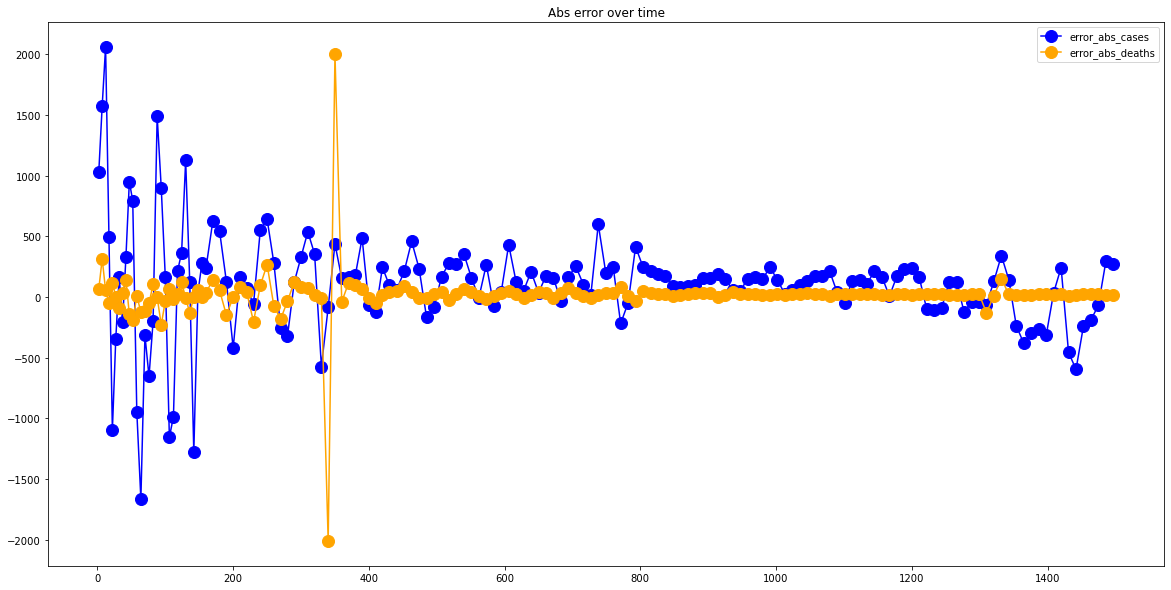

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1956.7450980392157
RMSE =  3860.0065698071353
-- Spain performances for deaths --
MAE =  125.80392156862744
RMSE =  328.5467903724708


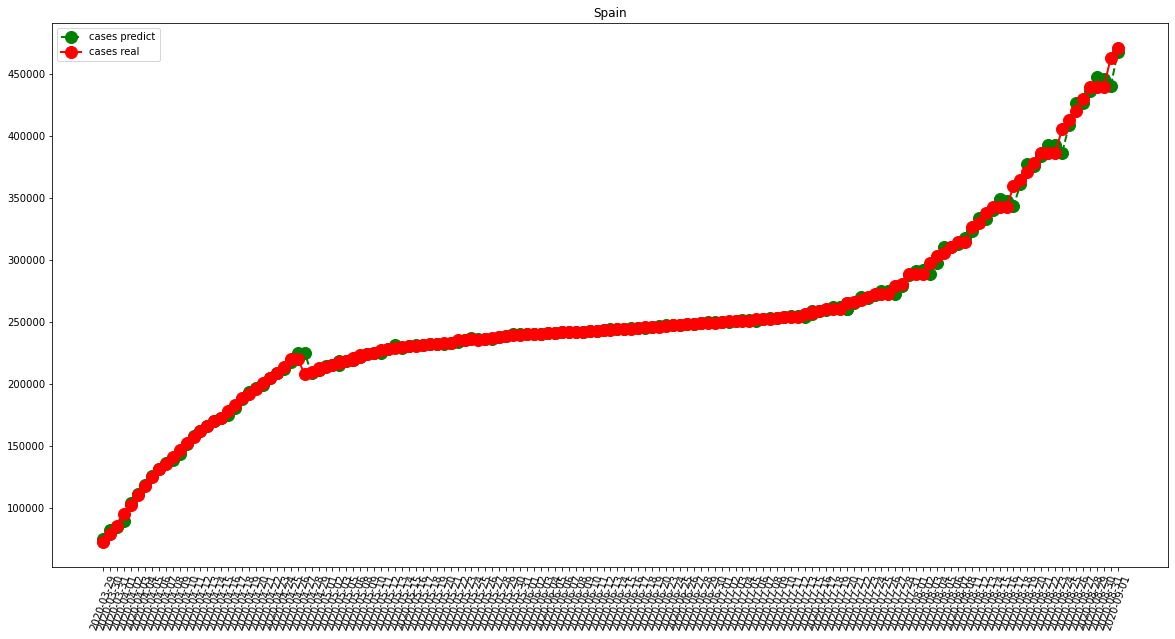

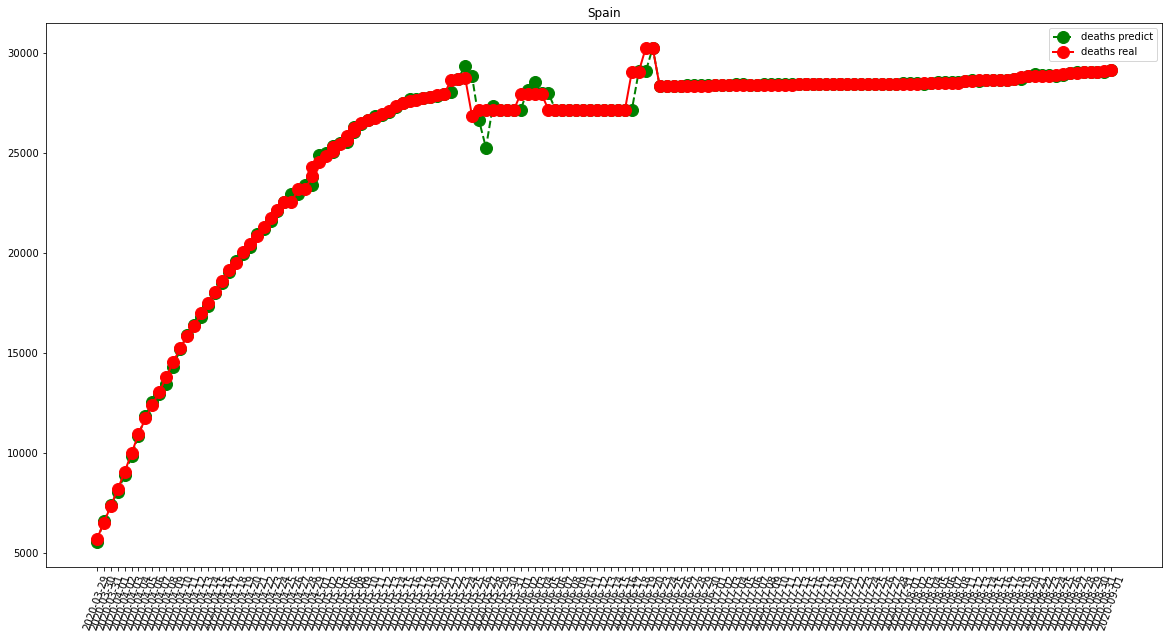

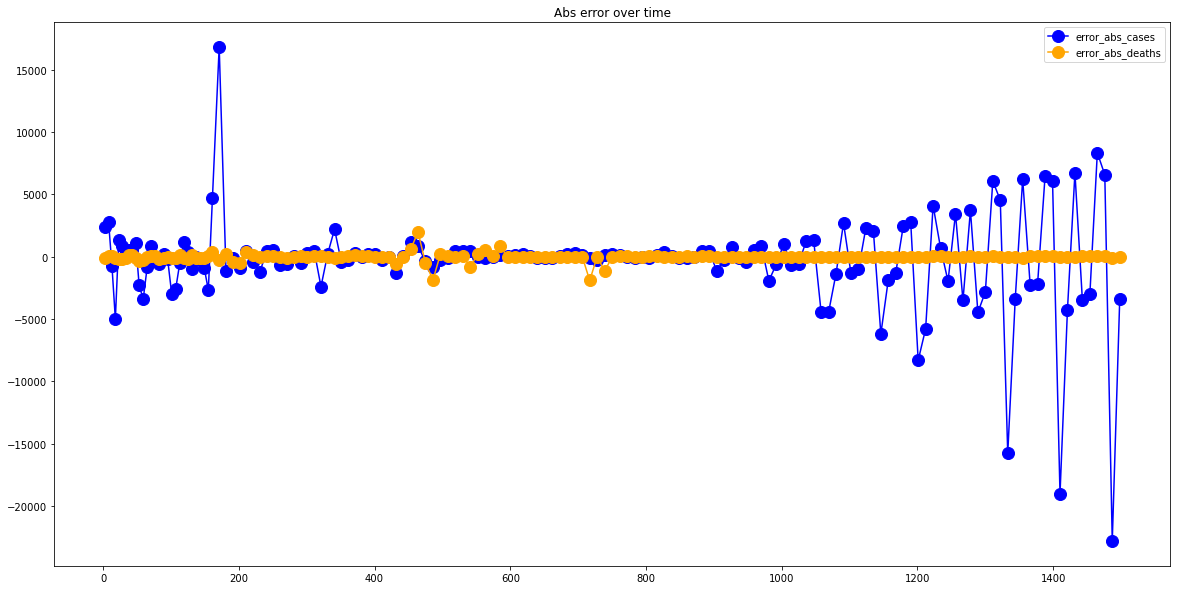

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  12272.830065359478
RMSE =  19139.115001804224
-- United States performances for deaths --
MAE =  489.7647058823529
RMSE =  691.331158882507


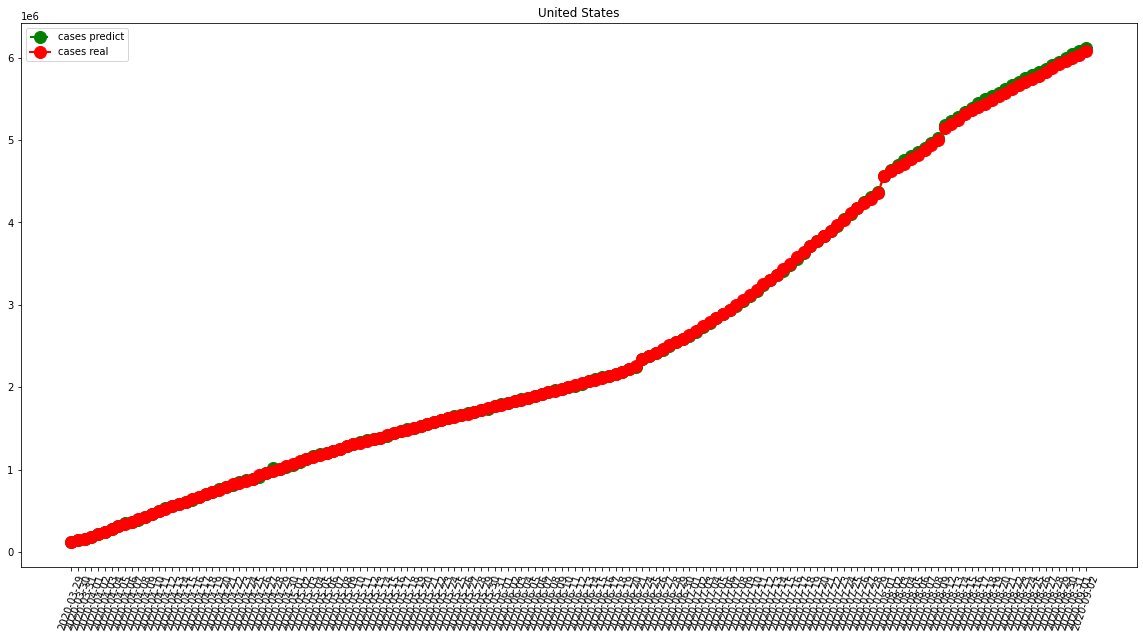

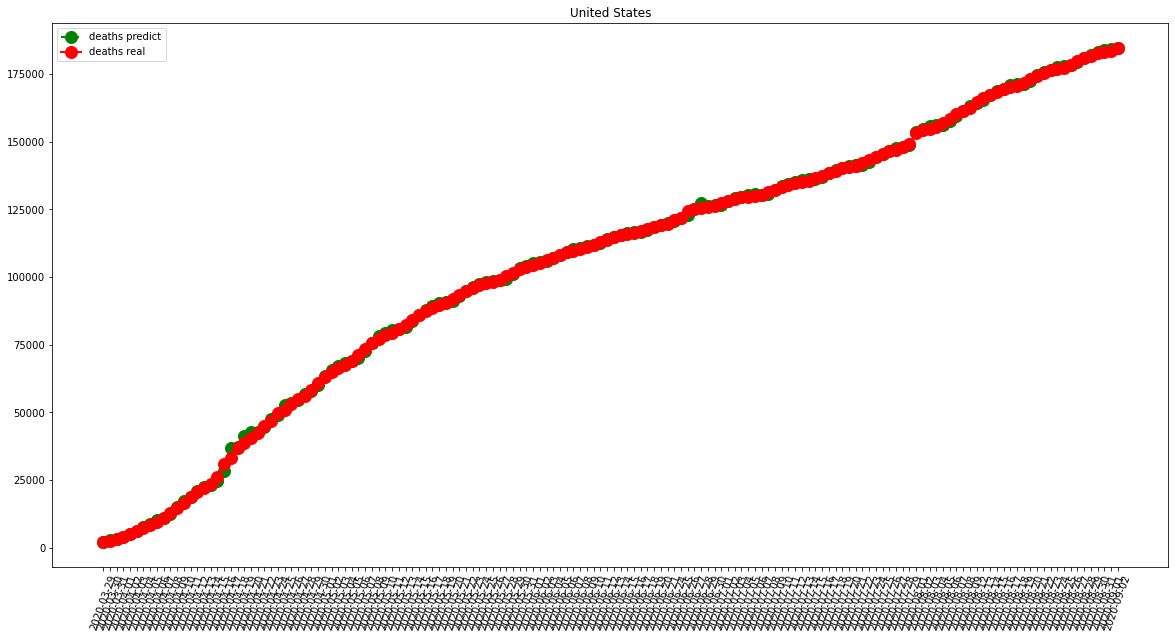

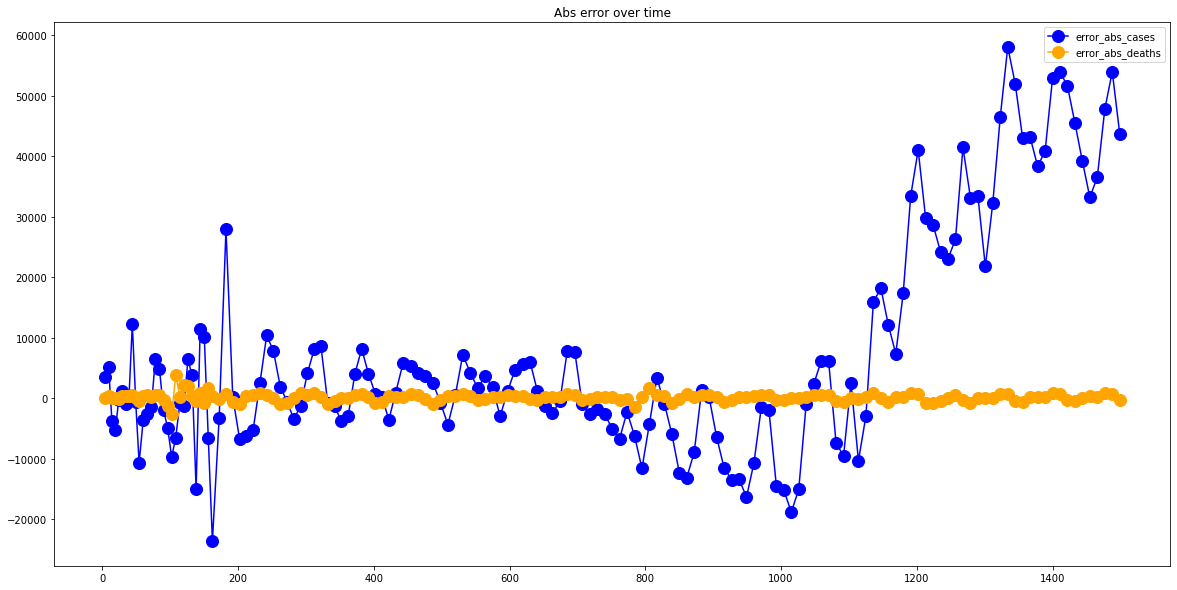

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  65.41176470588235
RMSE =  96.46435895717967
-- China performances for deaths --
MAE =  27.26797385620915
RMSE =  126.94494715365057


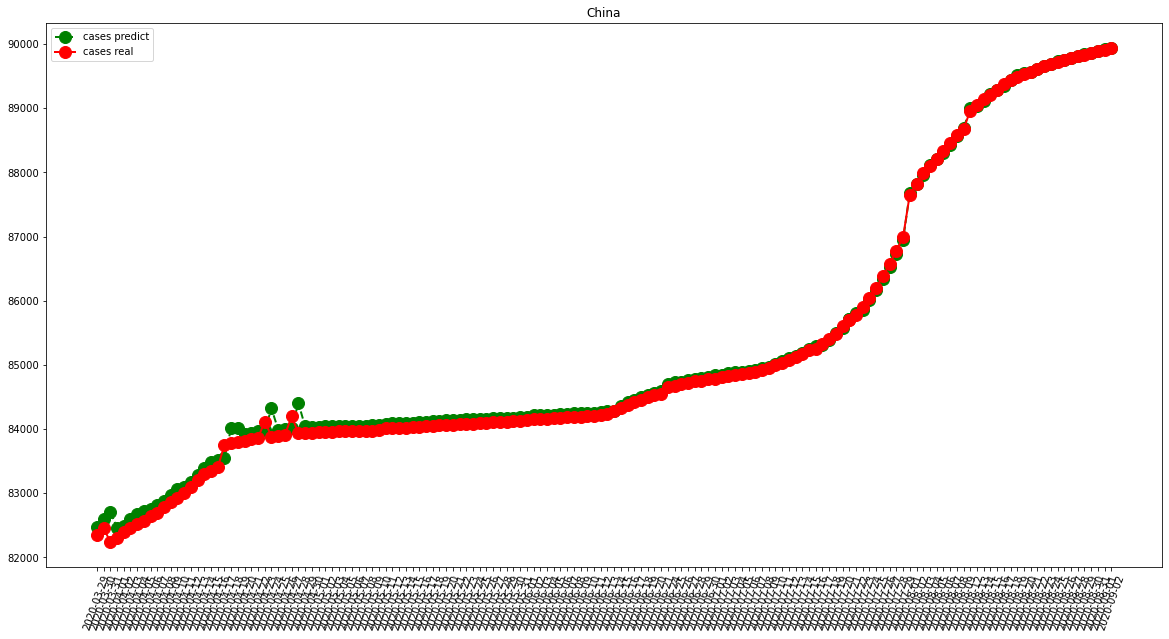

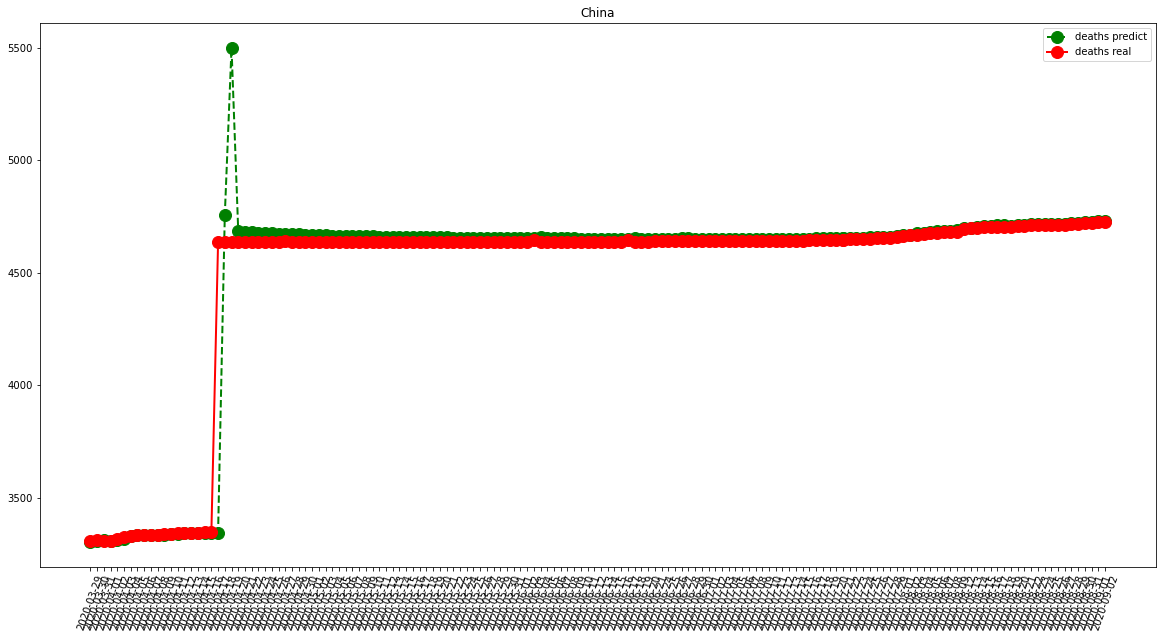

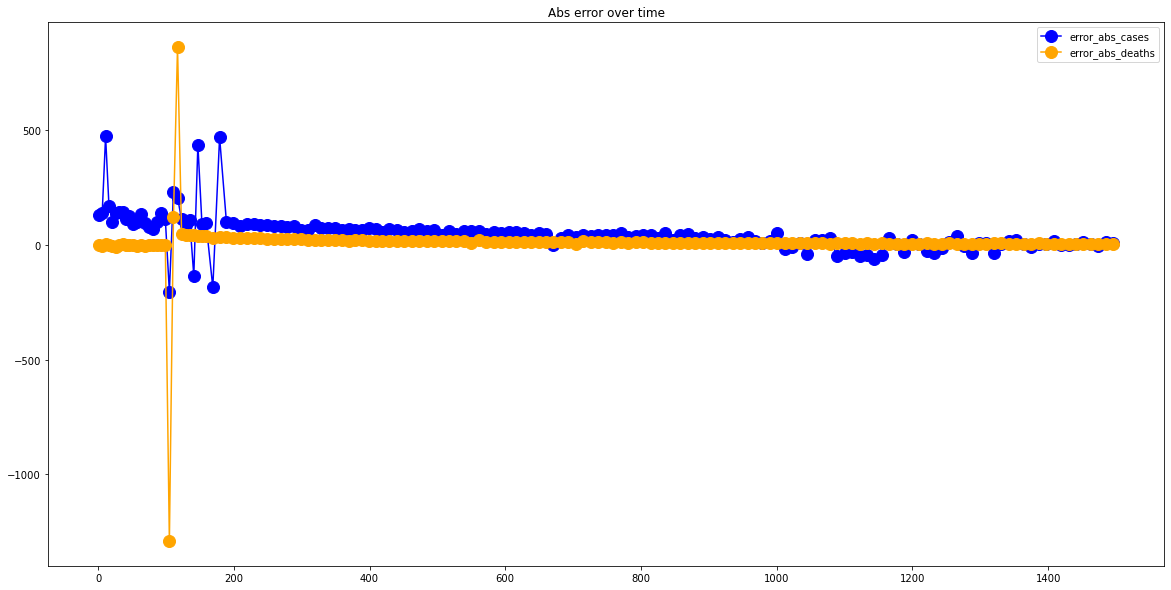

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1054.304
RMSE =  3740.061171692249
-- United Kingdom performances for deaths --
MAE =  242.192
RMSE =  763.3208499707052


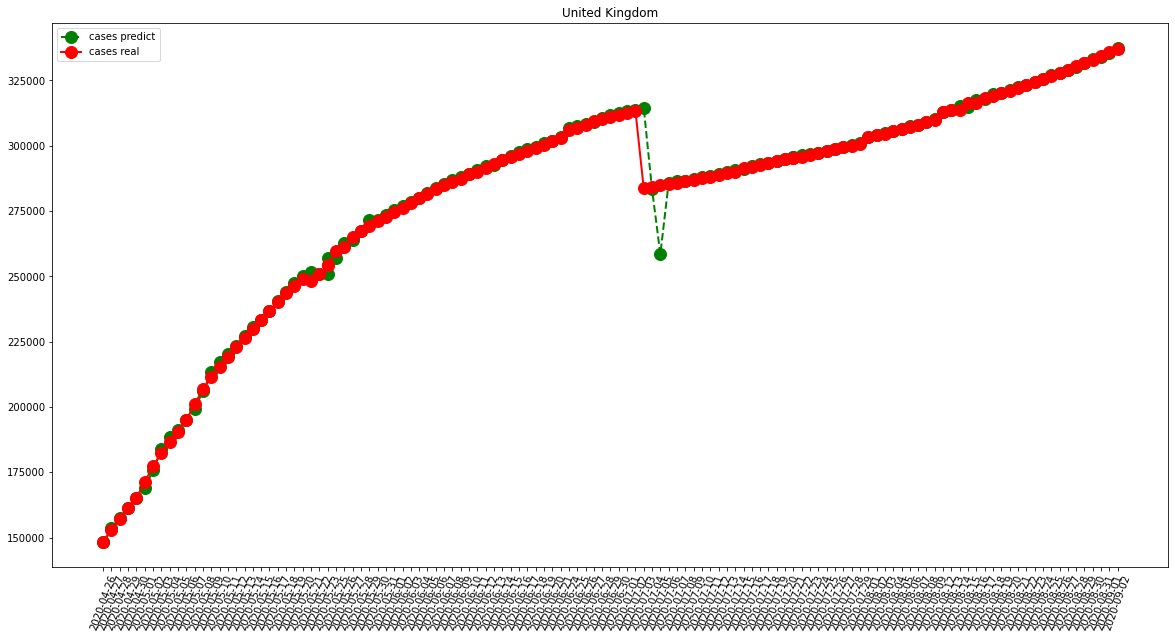

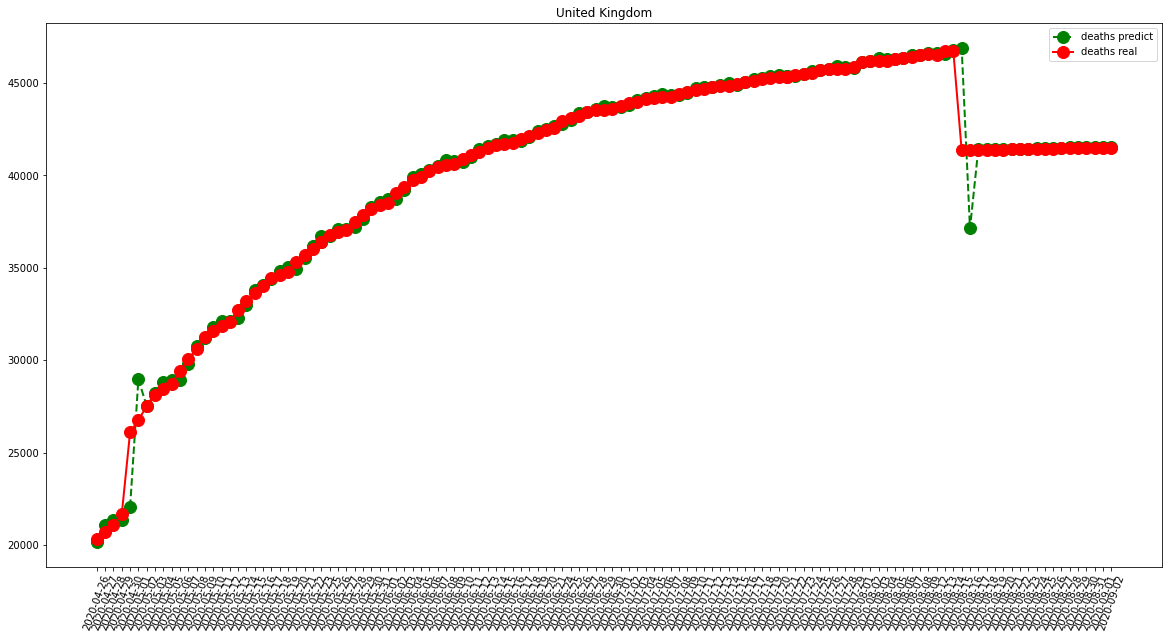

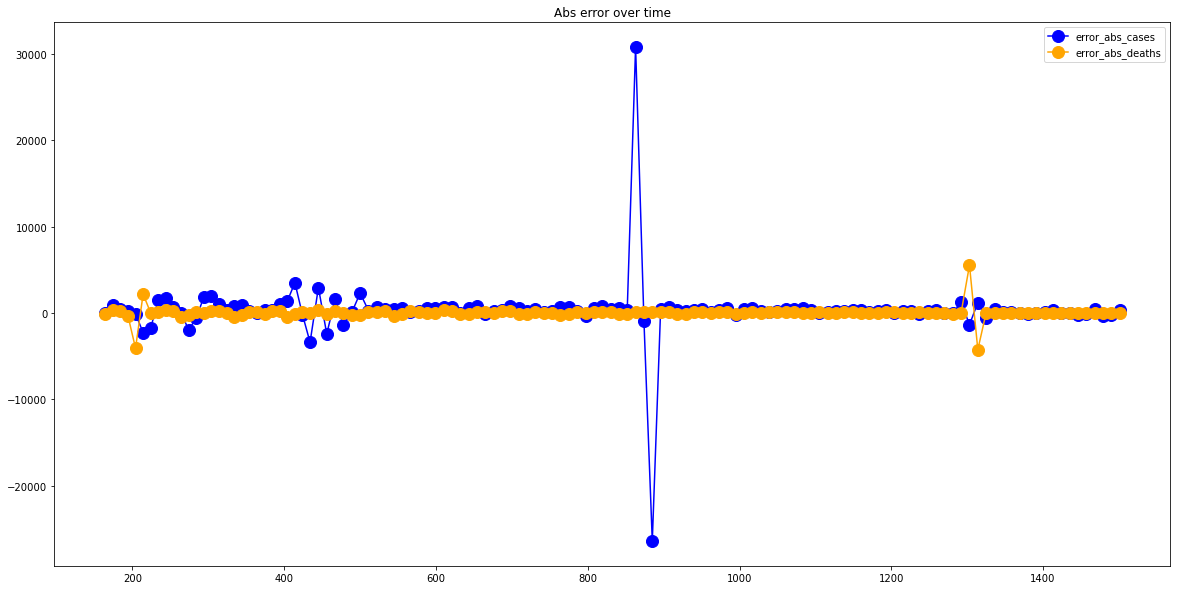

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  401.56
RMSE =  584.4384997585289
-- Germany performances for deaths --
MAE =  20.888
RMSE =  39.30770916754117


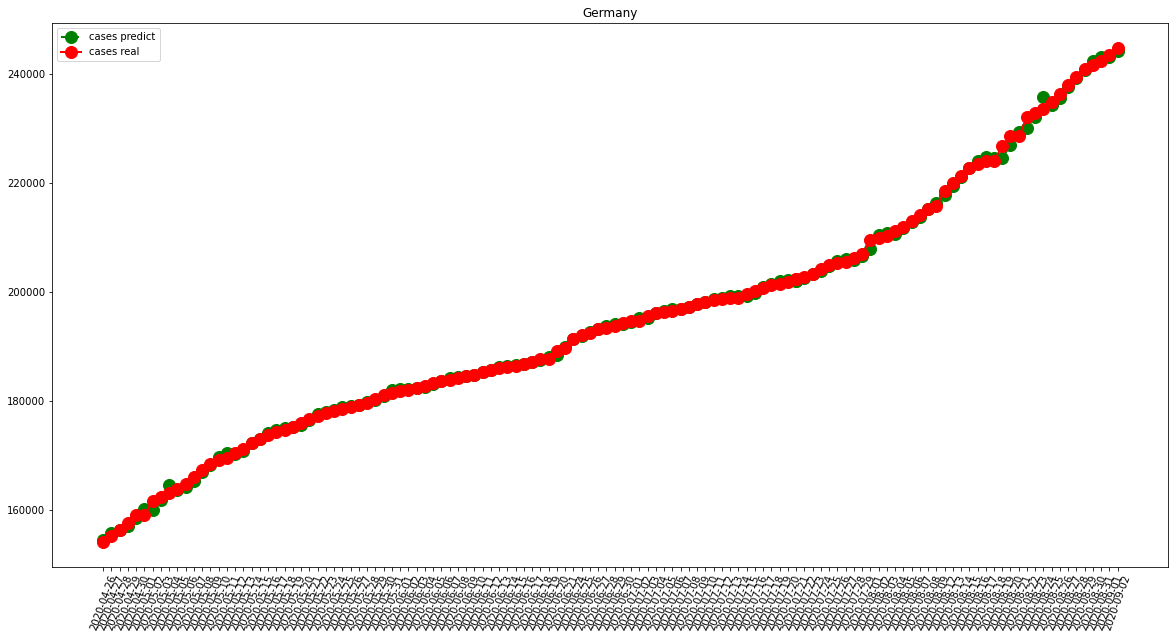

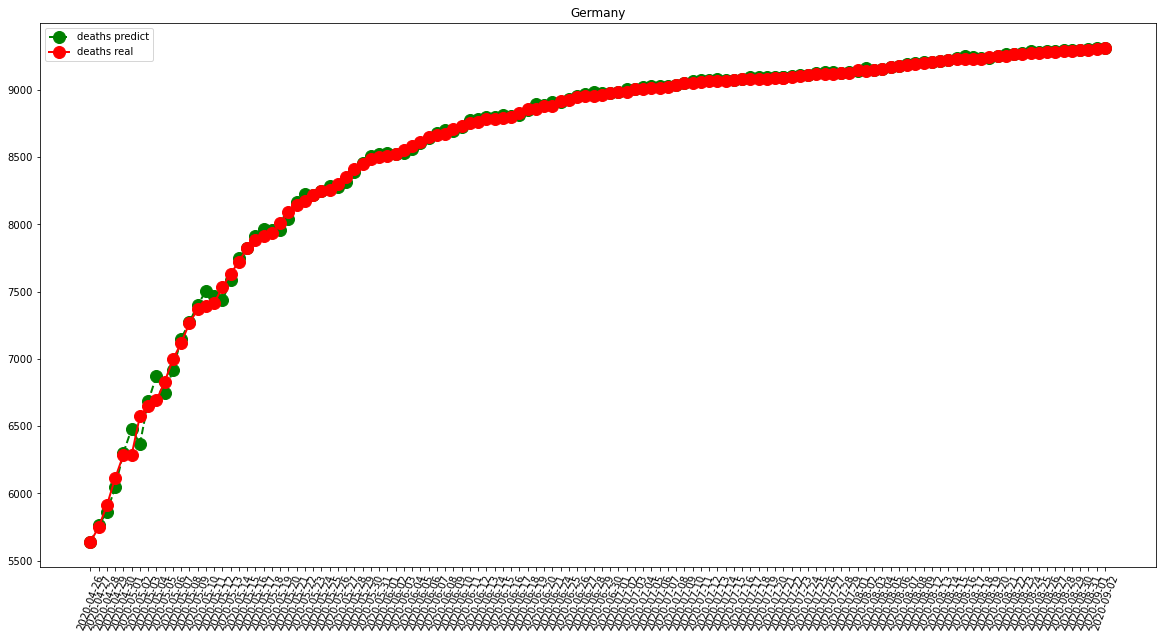

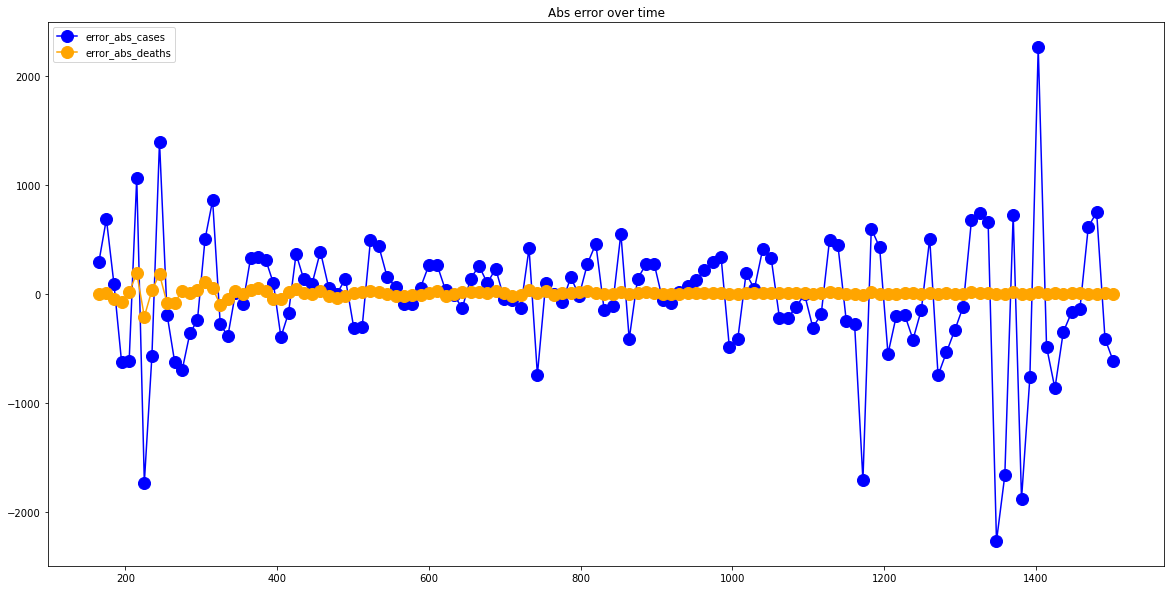

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  804.848
RMSE =  1182.2209675014228
-- Iran performances for deaths --
MAE =  45.488
RMSE =  83.02385199447205


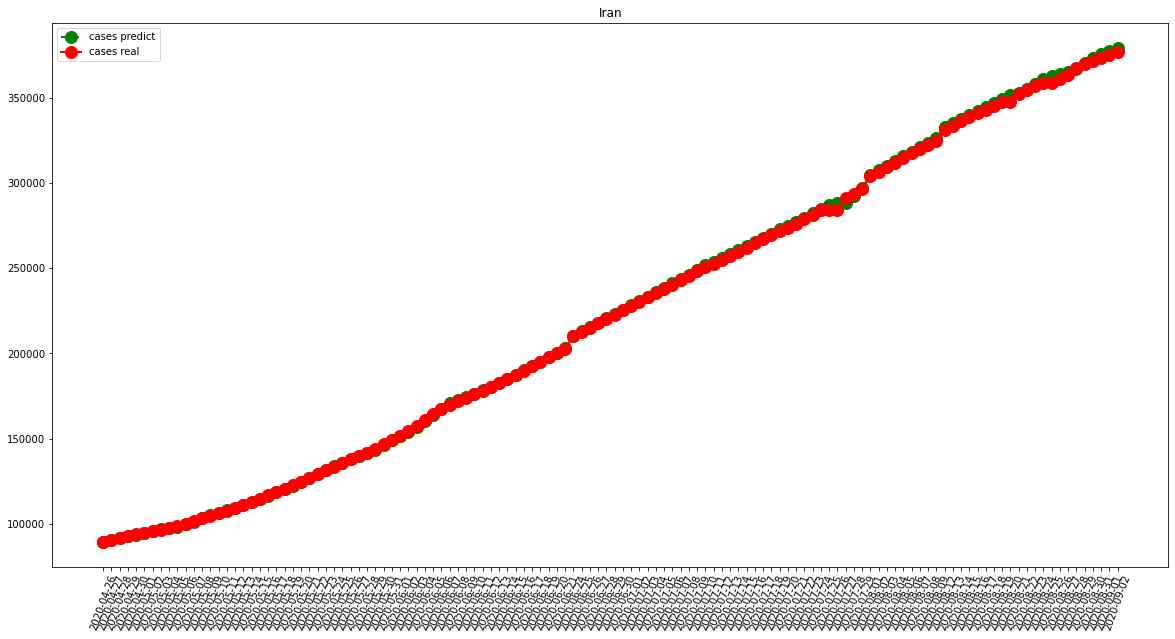

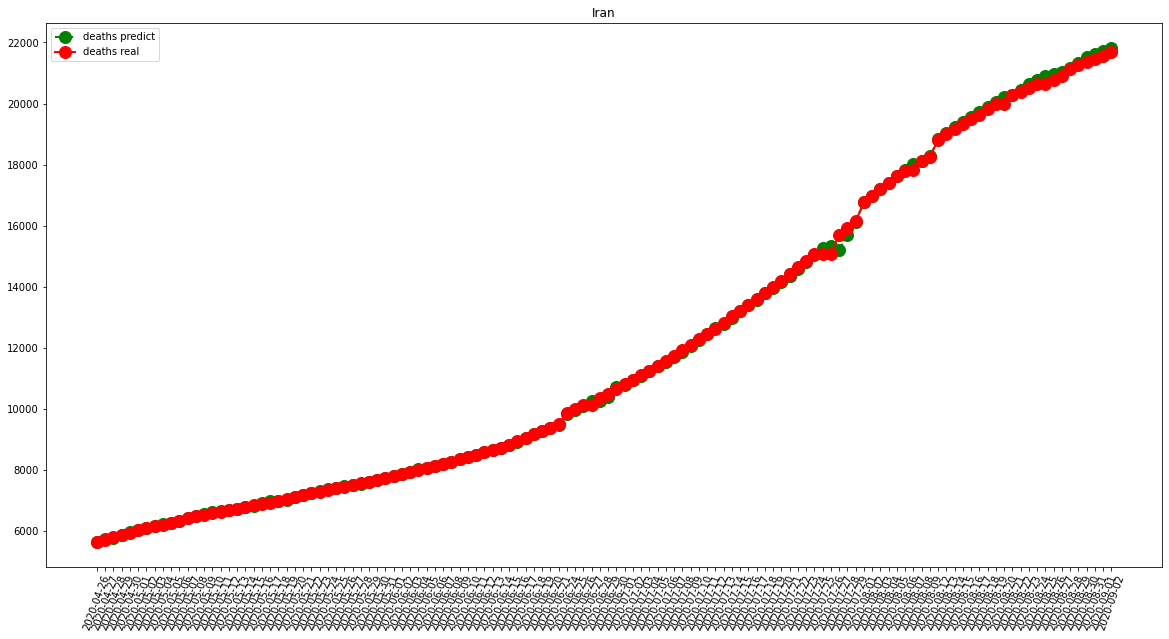

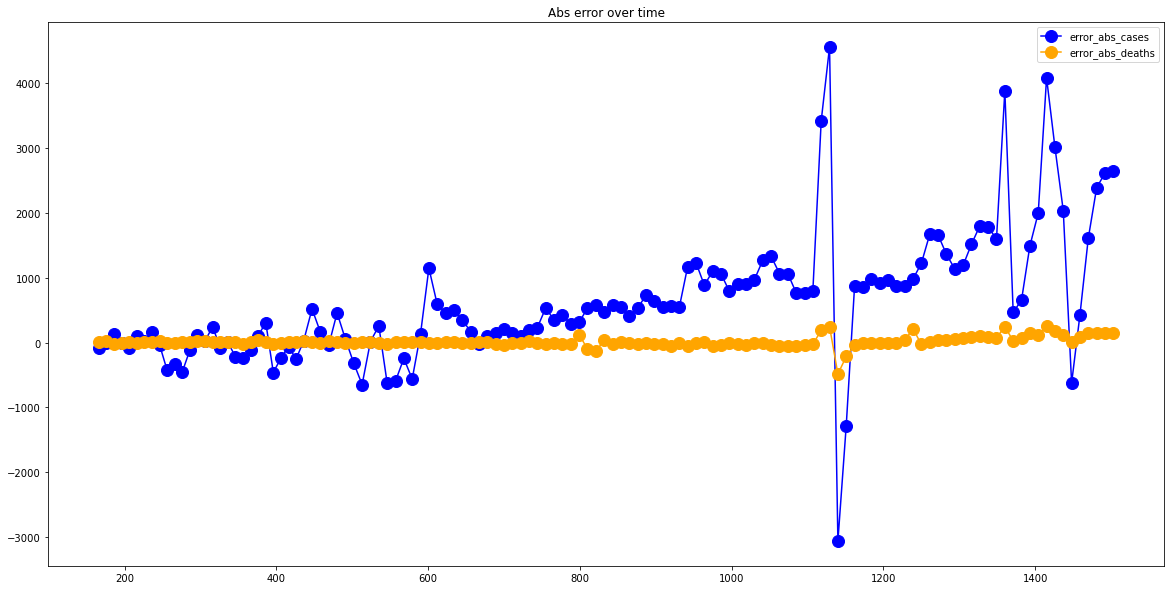

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  203.24
RMSE =  326.27138397352593
-- Turkey performances for deaths --
MAE =  16.304
RMSE =  90.85945190237503


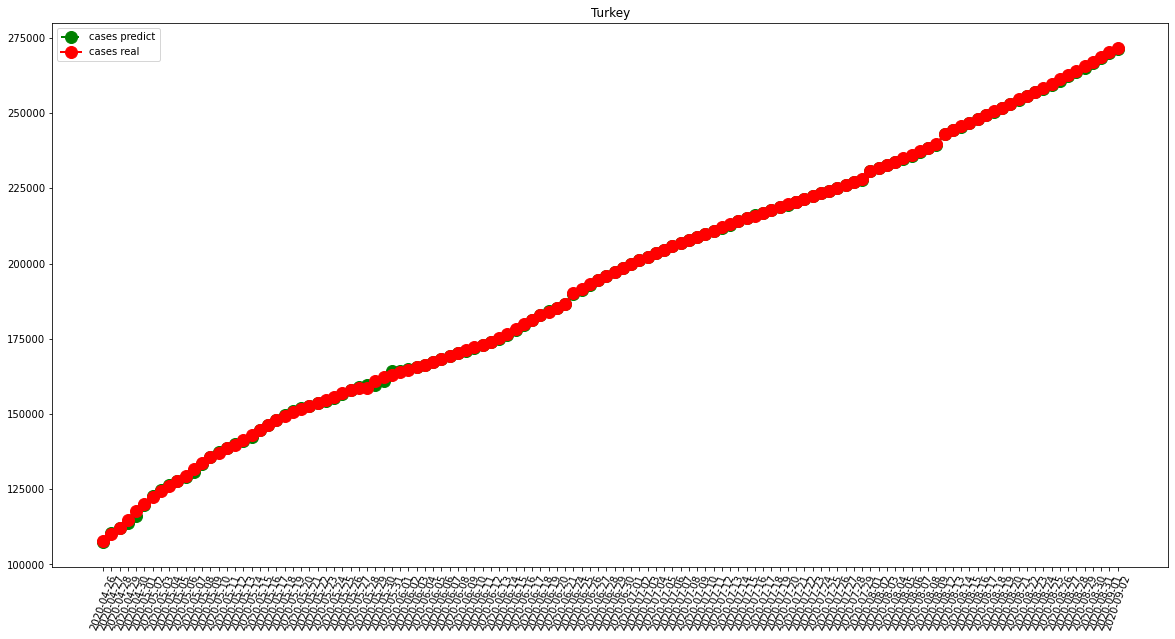

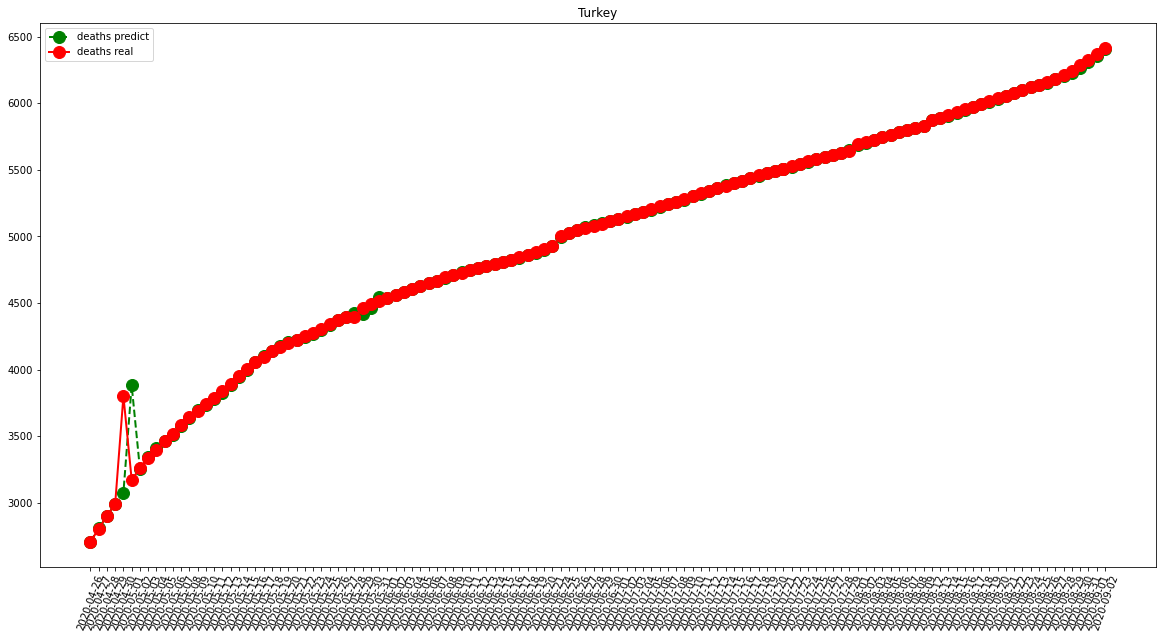

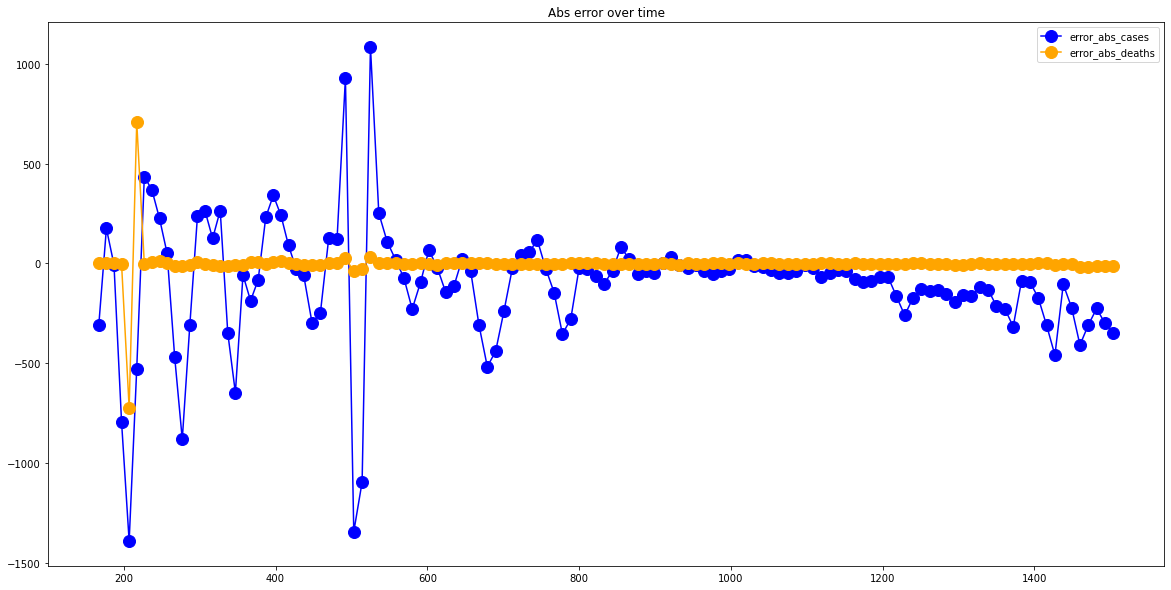

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13959.877551020409
RMSE =  18518.97201603297
-- Brazil performances for deaths --
MAE =  439.05102040816325
RMSE =  538.9804907301888


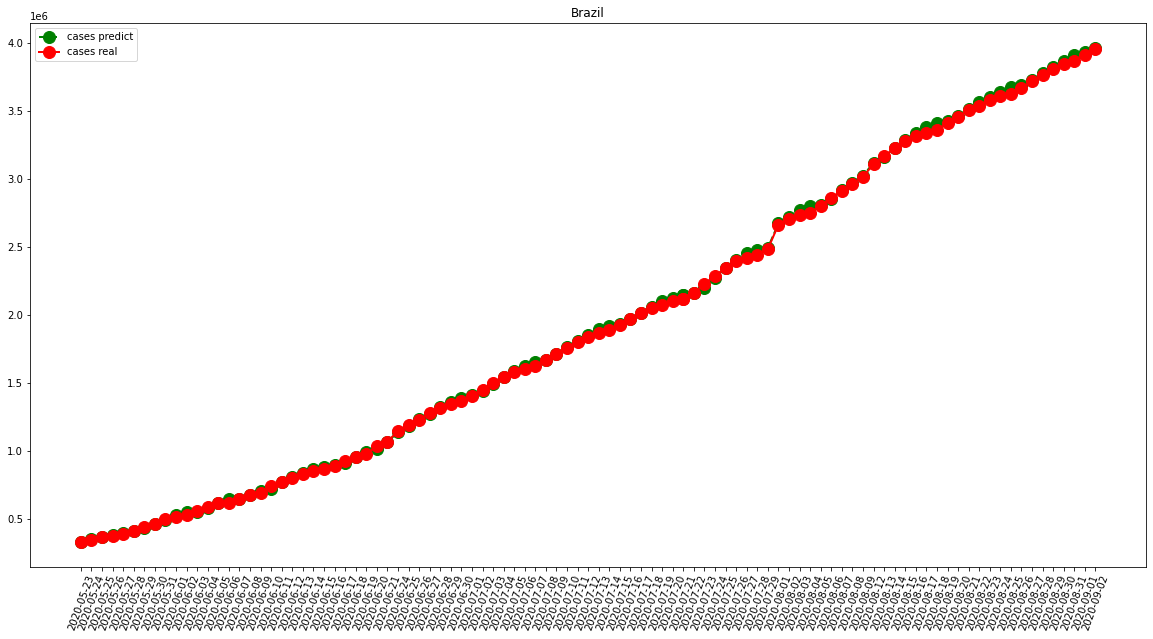

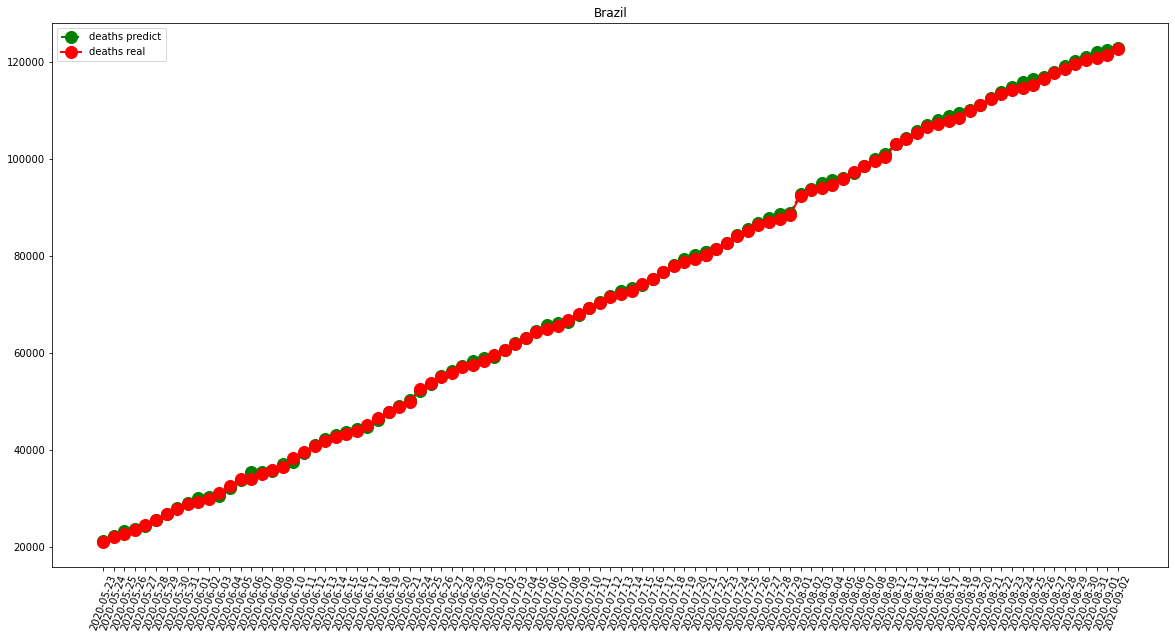

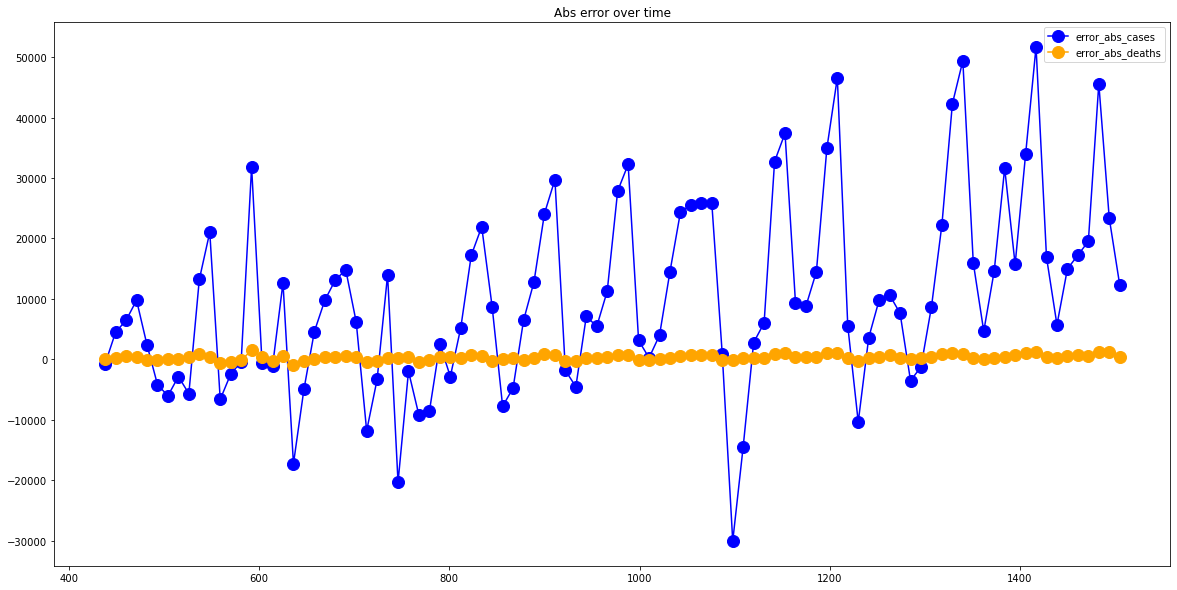

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)